<a href="https://colab.research.google.com/github/Kaizzen42/nnKarpathy/blob/main/TransformersToyProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro to Transformers

### Dataset


In [ ]:
# https://arxiv.org/pdf/2005.12872




In [ ]:
# [1, 2, 3, 4, 5, 6, 0, 0, 0, 0] => [6, 5, 4, 3, 2, 1]

# Autoregressive  vs Oneshot (Predict all six numbers at once)

import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

def generate_examples(num_examples):
    min_size = 4
    max_len = 15
    examples = []
    for _ in range(num_examples):
        # random_size = torch.randint(low=min_size, high=max_len, size=(1,))
        random_size = max_len
        input_seq = torch.randint(low=0, high=10, size=(random_size,))
        output_seq = torch.flip(input_seq, dims=(0,))



        l = max_len - len(input_seq)
        input_seq = F.pad(input_seq, (0, l))
        output_seq = F.pad(output_seq, (0, l))
        examples.append([input_seq, output_seq])
    return examples



NUM_EXAMPLES = 2
class FlipDataset(Dataset):
    def __init__(self, examples, split, train_split = 0.5):

        cutoff = int(train_split * len(examples))
        if split == "train":
            self.examples = examples[:cutoff]
        elif split == "test":
            self.examples = examples[cutoff:]

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, idx):
        return examples[idx]

examples = generate_examples(num_examples=NUM_EXAMPLES)
train_dataset = FlipDataset(examples, "train")
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)

test_dataset = FlipDataset(examples, "test")
test_dataloader = DataLoader(test_dataset, batch_size=64, num_workers=0)


next(iter(train_dataloader))

[tensor([[8, 7, 6, 6, 5, 8, 2, 2, 9, 2, 0, 7, 6, 3, 3]]),
 tensor([[3, 3, 6, 7, 0, 2, 9, 2, 2, 8, 5, 6, 6, 7, 8]])]

## Model

In [ ]:
# import torch.nn as nn

# class SimpleModel(nn.Module):
#     def __init__(self, in_channels, hidden_dim, out_channels):
#         super(SimpleModel, self).__init__()
#         self.layers = nn.Sequential(
#             nn.Linear(in_channels, hidden_dim),
#             nn.ReLU(),
#             nn.Linear(hidden_dim, hidden_dim),
#             nn.ReLU(),
#             nn.Linear(hidden_dim, out_channels)
#         )

#     def forward(self, x):
#         return self.layers(x)

# import torch
# import torch.nn as nn



# def train_and_evaluate(model, train_dataloader, test_dataloader, n_epochs, device="cpu"):
#     model.to(device)
#     optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.1)
#     loss_fn = torch.nn.MSELoss()
#     results = []

#     def accuracy(preds, labels):
#         # Ensure the predictions and labels are in the same device
#         preds = preds.to(labels.device)
#         # Calculate the number of element-wise matches
#         correct = (preds == labels).sum().item()
#         # Calculate total number of elements
#         total = preds.numel()
#         # Calculate accuracy
#         return correct / total

#     for epoch in range(n_epochs):
#         running_loss = 0.0

#         # Training loop
#         model.train()
#         for i, data in enumerate(train_dataloader):
#             inputs, labels = data
#             inputs = inputs.to(device).float()
#             labels = labels.to(device).float()

#             optimizer.zero_grad()
#             outputs = model(inputs)

#             loss = loss_fn(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()

#         train_loss = running_loss / len(train_dataloader)

#         # Evaluation loop
#         model.eval()
#         test_loss = 0.0
#         correct_preds = 0
#         total_preds = 0

#         with torch.no_grad():
#             for data in test_dataloader:
#                 inputs, labels = data
#                 inputs = inputs.to(device).float()
#                 labels = labels.to(device).float()

#                 outputs = model(inputs)
#                 loss = loss_fn(outputs, labels)
#                 test_loss += loss.item()

#                 preds = outputs.int()
#                 correct_preds += (preds == labels.int()).sum().item()
#                 total_preds += preds.numel()

#         test_loss /= len(test_dataloader)
#         test_accuracy = correct_preds / total_preds

#         results.append({
#             "epoch": epoch + 1,
#             "train_loss": train_loss,
#             "test_loss": test_loss,
#             "test_accuracy": test_accuracy
#         })

#         # print(f'Epoch {epoch + 1}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}')

#     return results

# # Example usage


# DEVICE = "cpu"
# N_EPOCHS = 5000
# model = SimpleModel(8, 256, 8)
# model.to(DEVICE)
# results = train_and_evaluate(model, train_dataloader, test_dataloader, N_EPOCHS, DEVICE)
# import matplotlib.pyplot as plt

# def plot_metrics(results):
#     epochs = [result["epoch"] for result in results]
#     train_losses = [result["train_loss"] for result in results]
#     test_losses = [result["test_loss"] for result in results]
#     test_accuracies = [result["test_accuracy"] for result in results]

#     fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#     # Plot losses
#     ax1.plot(epochs, train_losses, label='Train Loss')
#     ax1.plot(epochs, test_losses, label='Test Loss')
#     ax1.set_title('Train and Test Loss')
#     ax1.set_xlabel('Epoch')
#     ax1.set_ylabel('Loss')
#     ax1.legend()
#     ax1.grid(True)
#     ax1.set_ylim(0, 1)

#     # Plot accuracy
#     ax2.plot(epochs, test_accuracies, label='Test Accuracy', color='g')
#     ax2.set_title('Test Accuracy')
#     ax2.set_xlabel('Epoch')
#     ax2.set_ylabel('Accuracy')
#     ax2.legend()
#     ax2.grid(True)

#     plt.tight_layout()
#     plt.show()
# plot_metrics(results)











In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn

# Placeholder implementation for MultiHeadAttention
class MultiHeadAttention(nn.Module):
    def __init__(self, seq_len, d_model, n_heads):
        super(MultiHeadAttention, self).__init__()

        self.head_dim = d_model // n_heads
        self.n_heads = n_heads
        self.d_model = d_model

        self.q_proj = nn.Linear(d_model, d_model)
        self.k_proj = nn.Linear(d_model, d_model)
        self.v_proj = nn.Linear(d_model, d_model)

        self.out_proj = nn.Linear(d_model, d_model)


    def split_into_heads(self, x, batch_size, seq_len, n_heads, head_dim):
        return x.view(batch_size, n_heads, seq_len, head_dim)


    def forward(self, keys, queries, values, attention_mask=None):

        # keys: [B, S, d]
        # queries: [B, S, d]
        B, Sk, D = keys.shape
        B, Sq, D = queries.shape

        Q = self.q_proj(queries) # [B, Sq, d_model]
        K = self.k_proj(keys) # [B, Sk, d_model]
        V = self.v_proj(values) # [B, Sk, d_model]


        Q = self.split_into_heads(Q, B, Sq, self.n_heads, self.head_dim) # [B, n_heads, Sq, d_head]
        K = self.split_into_heads(K, B, Sk, self.n_heads, self.head_dim) # [B, n_heads, Sk, d_head]
        V = self.split_into_heads(V, B, Sk, self.n_heads, self.head_dim) # [B, n_heads, Sk, d_head]

        # Split into heads
        # scaled_dot_product_attention = torch.einsum("bhqd,bhkd->bhqk", Q, K)
        scaled_dot_product_attention = Q @ K.transpose(-2, -1) / torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32)) # [B, n_heads, seq_len_q, seq_len_k]
        scaled_dot_product_attention = F.softmax(scaled_dot_product_attention, dim = -1)

        output = scaled_dot_product_attention @ V
        output = output.view(B, Sq, self.d_model)
        output = self.out_proj(output)

        return output, scaled_dot_product_attention

class TransformerEncoderLayer(nn.Module):
    def __init__(self, seq_len, d_model, n_heads=8):

        super(TransformerEncoderLayer, self).__init__()
        hidden_dim = d_model * 4
        self.mha = MultiHeadAttention(seq_len, d_model, n_heads)
        self.layernorm1 = nn.LayerNorm(d_model)
        self.layernorm2 = nn.LayerNorm(d_model)
        self.feedforward = nn.Sequential(
            nn.Linear(d_model, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, d_model)
        )

    def forward(self, x):
        residual = x
        x, attentions = self.mha(keys=x, queries=x, values=x)
        x = x + residual  # add skip connection

        residual = x
        x = self.layernorm1(x)
        x = self.feedforward(x)
        x = x + residual  # add skip connection

        x = self.layernorm2(x)

        return x, attentions

class TransformerEncoder(nn.Module):
    def __init__(self, seq_len, d_model, num_layers):
        super(TransformerEncoder, self).__init__()
        self.layers = nn.Sequential(*[TransformerEncoderLayer(seq_len, d_model) for _ in range(num_layers)])

    def forward(self, x):
        all_att = []
        for layer in self.layers:
            x, attentions = layer(x)
            all_att.append(attentions)

        return x, all_att


class PositionalEncoding(nn.Module):
    """
    https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/
    """

    def __init__(self, seq_len, d_model, n=10000):
        super(PositionalEncoding, self).__init__()

        P = torch.zeros((seq_len, d_model))
        for k in range(seq_len):
            for i in torch.arange(int(d_model/2)):
                denominator = torch.pow(n, 2*i/d_model)
                P[k, 2*i] = torch.sin(k/denominator)
                P[k, 2*i+1] = torch.cos(k/denominator)
        self.register_buffer('P', P.unsqueeze(0))


    def forward(self, x):
        return x + self.P


class MyModel(nn.Module):
    def __init__(self, seq_len=8, num_layers=1, d_model=256, vocab_size=10):
        super(MyModel, self).__init__()
        self.embed = nn.Embedding(vocab_size, d_model)
        self.encoder = TransformerEncoder(seq_len, d_model, num_layers=num_layers)
        self.pe = PositionalEncoding(seq_len, d_model)

        # TODO: Write decoder
        # https://www.youtube.com/watch?v=kCc8FmEb1nY&t=5883s

        # 1, 2, 3, 4 => [4, 256]
        # teacher forcing


        self.prediction_layer = nn.Linear(d_model,10)


    def forward(self, x):
        # x [B, S, 1]
        x = self.embed(x) # [B, S, D]
        x = self.pe(x) # [B, S, D]
        x, attentions = self.encoder(x)  # [B, S, D]
        x = self.prediction_layer(x)
        x = F.softmax(x, dim=-1)
        return x, attentions

# Example usage
# [B, S, 1] => [B, S, d]

m = MyModel(seq_len=7)
input_tensor = torch.randint(0, 7, (3, 7))  # Example input
output, attentions = m(input_tensor)






2.1559572219848633
1.9806162118911743
1.8596264123916626
1.798788070678711
1.7620644569396973
1.7465202808380127
1.7120453119277954
1.67577064037323
1.6409748792648315
1.6067461967468262
1.6107943058013916
1.6055445671081543
1.5908713340759277
1.5634104013442993
1.5789819955825806
1.5683345794677734
1.5409196615219116
1.536490559577942
1.5342429876327515
1.5273290872573853
1.5176643133163452
1.4956072568893433
1.5037397146224976
1.4819071292877197
1.4686795473098755
1.466902494430542
1.4652689695358276
1.4635300636291504
1.462699055671692
1.4624168872833252
1.4623396396636963
1.462326169013977
1.4623160362243652
1.4622840881347656
1.462232232093811
1.462180733680725
1.4621429443359375
1.4621169567108154
1.4620964527130127
1.462076187133789
1.4620530605316162
1.4620262384414673
1.4619948863983154
1.4619601964950562
1.4619227647781372
1.4618834257125854
1.4618438482284546
1.4618048667907715
1.4617676734924316
1.4617325067520142
1.461699366569519
1.4616684913635254
1.46164071559906
1.4616

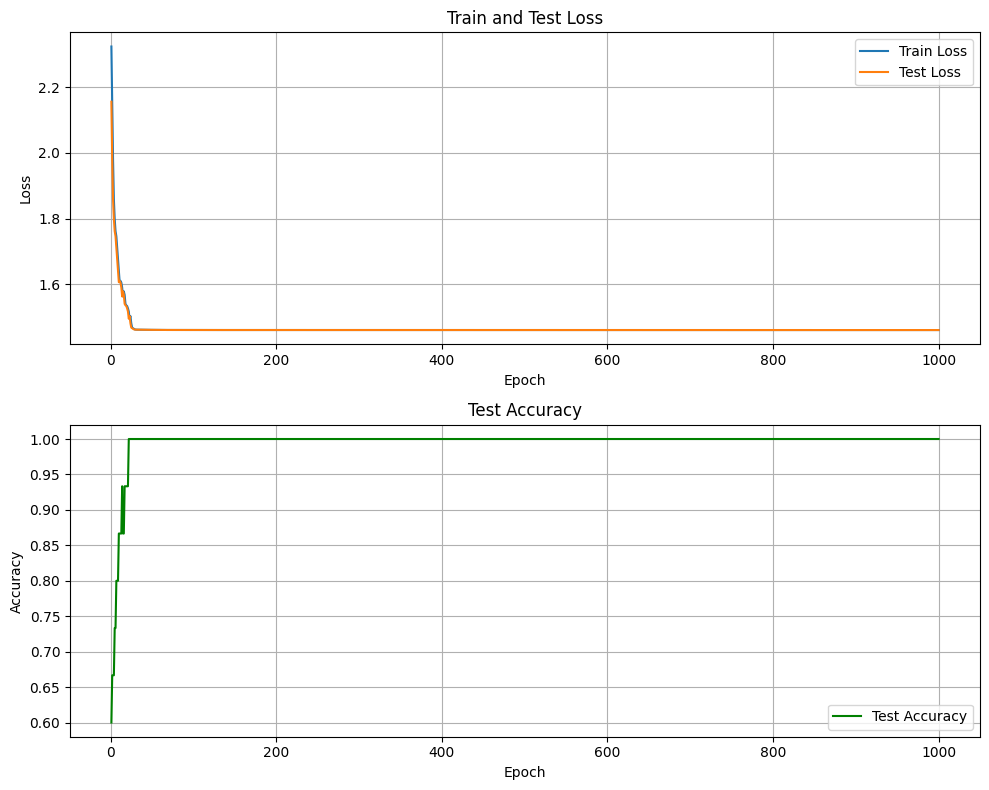

In [ ]:
def train_and_evaluate(model, train_dataloader, test_dataloader, n_epochs, device="cpu"):
    model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.1)
    loss_fn = nn.CrossEntropyLoss()
    results = []

    def accuracy(preds, labels):
        # Ensure the predictions and labels are in the same device
        preds = preds.argmax(dim=-1).to(labels.device)
        # Calculate the number of element-wise matches
        correct = (preds == labels).sum().item()
        # Calculate total number of elements
        total = preds.numel()
        # Calculate accuracy
        return correct / total

    for epoch in range(n_epochs):
        running_loss = 0.0

        # Training loop
        model.train()
        for i, data in enumerate(train_dataloader):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs, _ = model(inputs)

            loss = loss_fn(outputs.view(-1, outputs.size(-1)), labels.view(-1))
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_dataloader)

        # Evaluation loop
        model.eval()
        test_loss = 0.0
        correct_preds = 0
        total_preds = 0

        with torch.no_grad():
            for data in test_dataloader:
                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs, _ = model(inputs)
                loss = loss_fn(outputs.view(-1, outputs.size(-1)), labels.view(-1))
                test_loss += loss.item()

                preds = outputs.argmax(dim=-1)
                correct_preds += (preds == labels).sum().item()
                total_preds += preds.numel()

        print(test_loss)
        test_loss /= len(test_dataloader)
        test_accuracy = correct_preds / total_preds

        results.append({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "test_loss": test_loss,
            "test_accuracy": test_accuracy
        })

    return results

import matplotlib.pyplot as plt

# Visualization function
def plot_metrics(results):
    epochs = [result["epoch"] for result in results]
    train_losses = [result["train_loss"] for result in results]
    test_losses = [result["test_loss"] for result in results]
    test_accuracies = [result["test_accuracy"] for result in results]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot losses
    ax1.plot(epochs, train_losses, label='Train Loss')
    ax1.plot(epochs, test_losses, label='Test Loss')
    ax1.set_title('Train and Test Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot accuracy
    ax2.plot(epochs, test_accuracies, label='Test Accuracy', color='g')
    ax2.set_title('Test Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


DEVICE = "cuda"
N_EPOCHS = 1000
model =  MyModel(seq_len=15)
model.to(DEVICE)
results = train_and_evaluate(model, train_dataloader, test_dataloader, N_EPOCHS, DEVICE)
plot_metrics(results)

# Function to visualize attention weights


# Example usage of plot_attention
# plot_attention(attentions, layer_num=0, head_num=0)



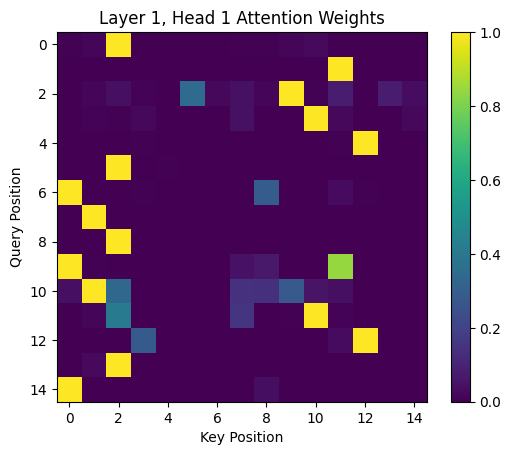

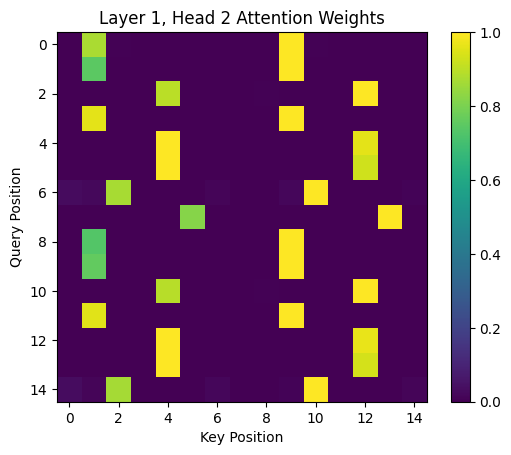

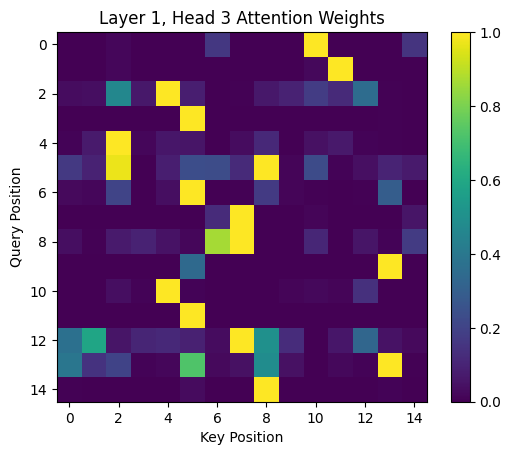

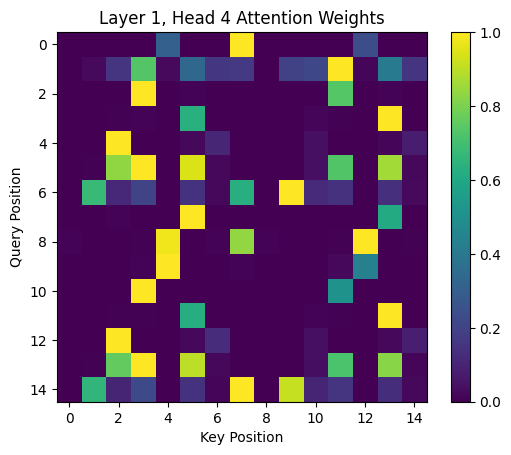

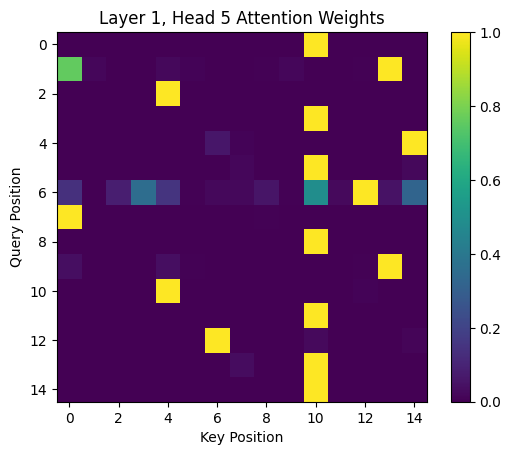

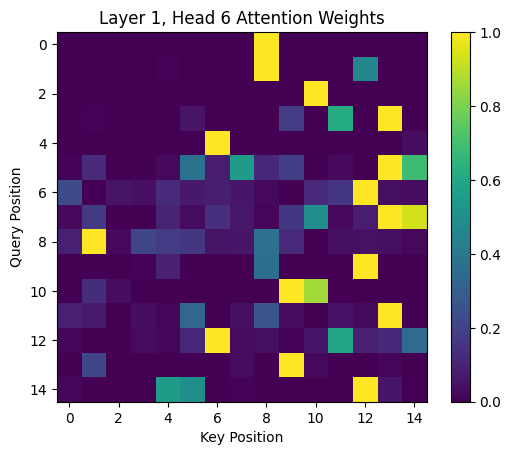

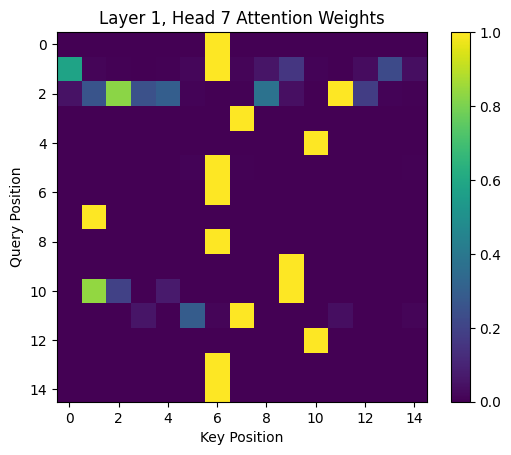

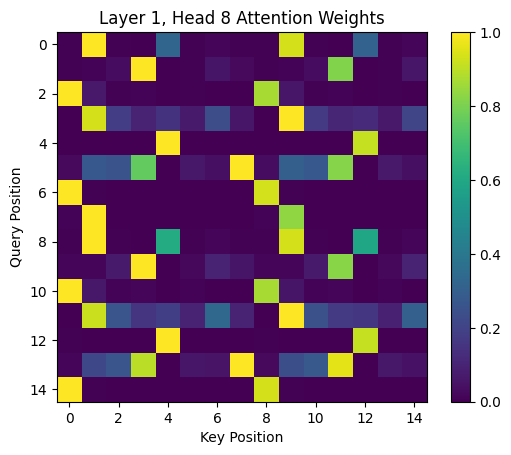

In [ ]:

import matplotlib.pyplot as plt

def plot_attention(attentions, head_num=0):
    attn = attentions[head_num].detach().cpu()
    plt.imshow(attn, cmap='viridis')
    plt.colorbar()
    plt.title(f'Layer 1, Head {head_num + 1} Attention Weights')
    plt.xlabel('Key Position')
    plt.ylabel('Query Position')
    plt.show()

with torch.no_grad():
    device = "cuda"

    total_att = torch.zeros(20, 8, 15, 15).to(device)
    for data in test_dataloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs, attentions = model(inputs)
        for head_idx in range(8):
            total_att[:, head_idx] += attentions[0][:, head_idx]

    # Sum the attention weights across the batch dimension
    total_att = total_att.sum(dim=0)

    # Normalize the attention weights across the head dimension
    total_att_min = total_att.min(dim=-1, keepdim=True)[0]
    total_att_max = total_att.max(dim=-1, keepdim=True)[0]
    total_att_normalized = (total_att - total_att_min) / (total_att_max - total_att_min)

    # Plot the attention weights for the first head (as an example)
    for head_idx in range(8):
        plot_attention(total_att_normalized, head_num=head_idx)







# MyModel(example[0])

### Plan
* Build the dataset and dataloader
*

In [ ]:
def func(*args, **kwargs):
    pass

func(323, 32423, t=57, y=23, trt=23)